In [1]:
from dataccess.nbfunctions import *

# Data logging and analysis at MEC

The purpose of this document is to demonstrate basic usage of an analysis package developed by the Seidler group for LK20.

## 1. Dataset definition

The basic object containing a set of run numbers and associated experimental conditions (sample name or x-ray focal spot size) is a dataset. A dataset contains a minimum of two attributes: a set of run numbers and a unique label.

Datasets are implemented by the class `dataccess.query.DataSet` and can be created in several ways: 

### 1. Direct call to the constructor:

In [2]:
from dataccess import query

bar = query.DataSet([206, 207], label = 'foo')
print "label: {0}; runs: {1}".format(bar.label, bar.runs)

label: foo; runs: [206, 207]


### 2. Logging spreadsheet: direct reference
For example, the following dataset references row 15 in the LK20 logging spreadsheet below and is constructed using its label:

In [2]:
baz = query.existing_dataset_by_label('MgO_75fs_2um_a')
print "label: {0}; runs: {1}".format(baz.label, baz.runs) 

label: MgO_75fs_2um_a; runs: (886,)


We can retrieve values of dataset attributes provided in the logbook:

In [3]:
print baz.get_attribute('material')

MgO


### 3. Logging spreadsheet: attrubute queries
Finally, we can create datasets by performing simple queries on logbook-specified dataset attributes. For example, if we want to create a dataset containing all dark runs in LK20 we can define:

In [5]:
from dataccess.nbfunctions import get_query_dataset
darks = get_query_dataset('material dark')

Runs:  [85, 89, 97, 127, 200, 340, 379, 436, 662, 875, 881, 892, 900, 905, 910, 924]


### Logging spreadsheet for LK20:

In [6]:
from IPython.display import IFrame
IFrame('https://docs.google.com/spreadsheets/d/1DRtTTiatTbN2z4brGJxJ1OkWRMCj3gyoPfFRN5fvl3M/edit?pref=2&pli=1#gid=743951055',
       width=1000, height=400)

## 2. Visualization and summary diagnostics

Show average Si spectrometer signal for runs 206 and 207: 

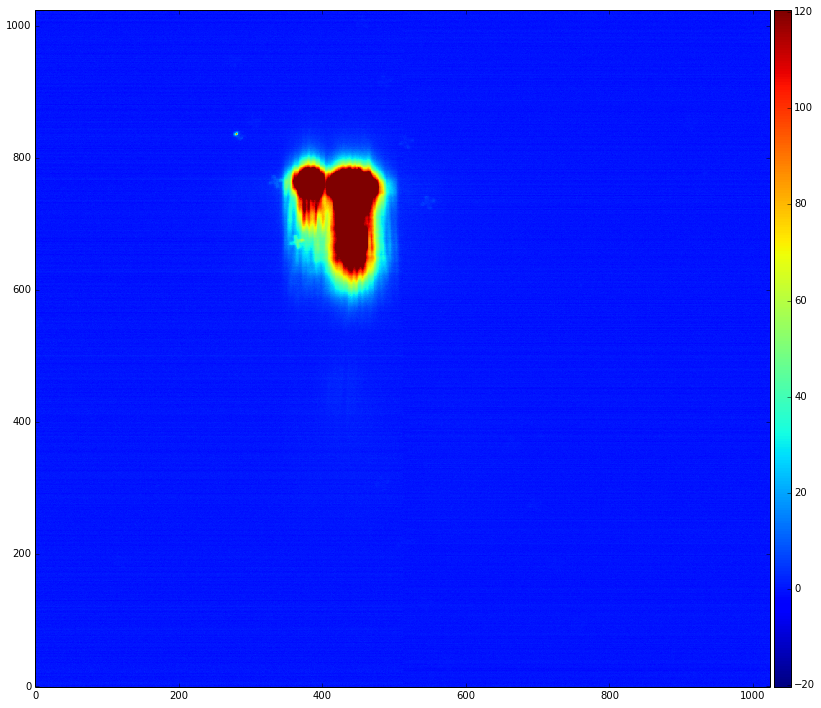

In [7]:
from dataccess.datashow import show

r206 = query.DataSet([206, 207], label = 'r206-7')
_ = show([r206], 'si')

## Plot XRD powder patterns from detector 'quad2' (a CSPAD) for several datasets corresponding to different focal spot sizes:

In [8]:
MgO_ref_short = [get_query_dataset('material MgO runs 870 961 transmission 1. focal_size %d' % spotsize,
                                'MgO.ref.1C.short2.%sum' % spotsize, print_enable = False)
                                for spotsize in [4, 8, 18, 28, 38, 48, 58]]

In [9]:
plot_xrd(MgO_ref_short, compound_list = ['MgO'], normalization = None, bgsub = False, plot_patterns = True)

## Generate spectra of the XFEL pulse for runs 206 (one color) and 530 (two color):

In [10]:
from dataccess.xes_process import spectrum

_ = spectrum('si', ['206', '530'], transpose=True, calib_load_path='si_calib')